# Pós-graduação em Ciência da Computação - UFABC
## Projeto de Mineração de Dados   Prof Thiago Covões
### Alunos: Fernanda Borges e Thiago Rizuti

# Introdução

O projeto tem como objetivo interpretar automaticamente captchas de aúdio. O problema foi tratado como classificação multiclasse, na qual cada possível caracter do captcha representa uma classe. 

Foi utilizada a base disponibilizada pelo professor, contendo 200 observações para o conjunto de desenvolvimento e ? observações para o conjunto de validação. Cada captcha é formado por uma sequência de 4 caracteres, sendo eles: a, b, c, d, h, m, n, x, 6 ou 7.

Foram usadas as seguintes bibliotecas:

In [307]:
import librosa 
import librosa.display as display

import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
%matplotlib inline

import os 

# Extração de Features

In [243]:
def read_captchas(path):
    wavs = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and file.endswith('.wav')]
    captchas = []
    for wav in wavs:
        signal, sampling_rate = librosa.load(os.path.join(path,wav), None) 
        label = wav.split('.wav')[0]
        captchas.append((signal,sampling_rate,label))
    return captchas

In [274]:
def split_characters(captchas):
    chars = [] 
    for captcha in  captchas:
        signal = captcha[0]
        sampling_rate=captcha[1]
        label=captcha[2]
        chars += [(signal[sampling_rate*2*i:sampling_rate*2*(i+1)],sampling_rate,label[i]) for i in range(4)]
    return chars

In [305]:
def extract_features(chars):
    data = pd.DataFrame()
    for char in chars:
        signal = char[0]
        sampling_rate=char[1]
        label=char[2]
        row = pd.DataFrame()
        row['label'] = [label]
        mfcc = librosa.feature.mfcc(signal,sampling_rate)
        for i,mfcc in enumerate(mfcc):
            row['mfcc_'+str(i)+'_mode'] = [np.mean(sp.stats.mode(mfcc))]
            row['mfcc_'+str(i)+'_min'] = [np.min(mfcc)]
            row['mfcc_'+str(i)+'_max'] = [np.max(mfcc)]
            row['mfcc_'+str(i)+'_mean'] = [np.mean(mfcc)]
            row['mfcc_'+str(i)+'_std'] = [np.std(mfcc)]
            row['mfcc_'+str(i)+'_median'] = [np.median(mfcc)]
            row['mfcc_'+str(i)+'_iqr'] = [sp.stats.iqr(mfcc)]
        data = data.append(row)
    return data.reset_index(drop=True)
   

In [266]:
train_captchas = read_captchas('base_treinamento_I')
len(train_captchas)

200

In [275]:
train_chars = split_characters(train_captchas)
len(train_chars)

800

In [306]:
data = extract_features(train_chars)
data.shape

(800, 141)

## exemplo

In [278]:
audio, sampling_rate = librosa.load('base_treinamento_I/6a67.wav', None) 

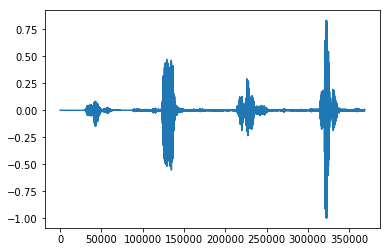

In [279]:
plt.plot(audio)

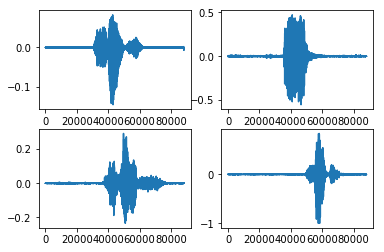

In [280]:
fig, ax = plt.subplots(2,2)

ax[0][0].plot(chars[0])
ax[0][1].plot(chars[1])
ax[1][0].plot(chars[2])
ax[1][1].plot(chars[3])